### Keras DNN으로 심장병 예측

1. 패키지 수입 및 파라미터 지정

In [ ]:
# 패키지 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
# 하이퍼 파라미터
INPUT_DIM = 13 # 14개의 컬럼 중 입력값
MY_SPLIT = 0.7 # 학습용 데이터를 0.7 정도로
MY_HIDDEN = 500 # 은닉층 뉴런의 개수
MY_EPOCH = 1000 # 반복 횟수

# 추가 옵션
pd.set_option('display.max_columns', None) # display.max_colmns를 None으로. 컬럼 생략 x
np.random.seed(1234) # 실행할 때마다 결과가 달라지는 것 방지
sns.set(font_scale=1.5)

2. 데이터 처리

데이터 샘플 10개
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0    

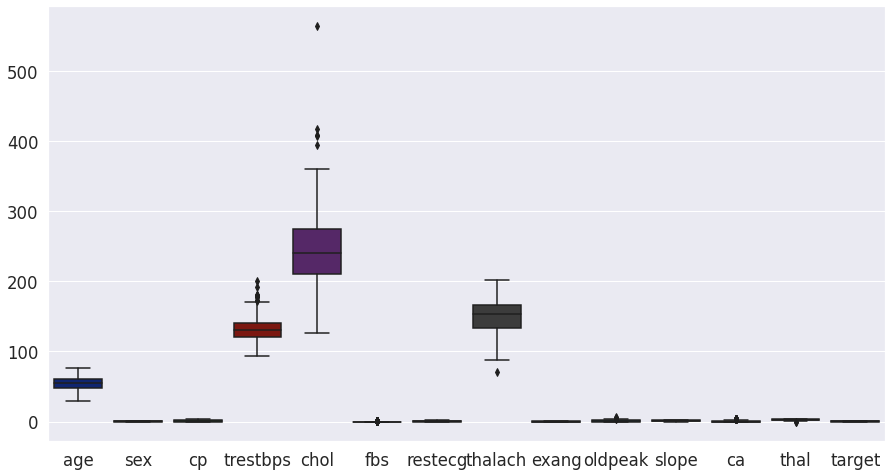

In [ ]:
# 데이터 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heart.csv')

# 샘플 내용 확인 함수
# 입력 데이터는 반드시 pandas의 데이터 프레임
def show_sample(data):
    # 샘플 출력
    print('데이터 샘플 10개')
    print(data.head(10))

    # 통계 출력
    print('데이터 통계')
    print(data.describe())

    # 상자 그림 출력
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=data, palette='dark') # 후에 정규화 필요함

show_sample(raw)

In [ ]:
# 데이터 입력/출력 분할
print(raw.shape)
X_data = raw.drop('target', axis=1)

print(X_data.shape)
Y_data = raw['target']
print(Y_data.shape)

names = X_data.columns # 입력 데이터 13개 요소의 이름
# z-점수 정규화로 열 명이 숫자로 바뀌는 것 처리
print(names)

(303, 14)
(303, 13)
(303,)
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
데이터 샘플 10개
        age       sex        cp  trestbps       fbs   restecg   thalach  \
0  0.952197  0.681005  1.973123  0.763956  2.394438 -1.005832  0.015443   
1 -1.915313  0.681005  1.002577 -0.092738 -0.417635  0.898962  1.633471   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.417635 -1.005832  0.977514   
3  0.180175  0.681005  0.032031 -0.663867 -0.417635  0.898962  1.239897   
4  0.290464 -1.468418 -0.938515 -0.663867 -0.417635  0.898962  0.583939   
5  0.290464  0.681005 -0.938515  0.478391 -0.417635  0.898962 -0.072018   
6  0.180175 -1.468418  0.032031  0.478391 -0.417635 -1.005832  0.146634   
7 -1.143291  0.681005  0.032031 -0.663867 -0.417635  0.898962  1.021244   
8 -0.260980  0.681005  1.002577  2.306004  2.394438  0.898962  0.540209   
9  0.290464  0.681005  1.002577  1.049520 -0.417635  0.898962  1.064975   

      exang   oldpeak     slope        ca      thal    target  
0 -0.696631  1.087338 -2.274579 -0.71

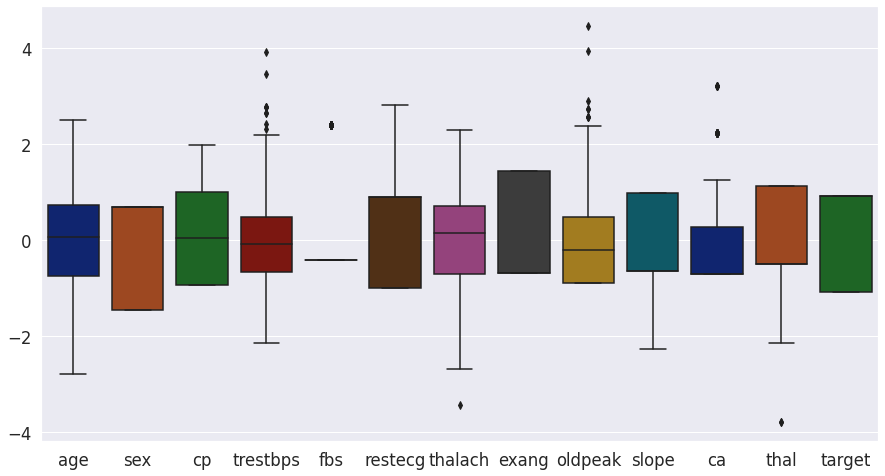

In [ ]:
# 입력 데이터 z-점수 정규화
scaler = StandardScaler()
print(type(X_data))

X_data = scaler.fit_transform(X_data)
print(type(X_data))

# numpy를 pandas로 재전환, 컬럼명을 names로 
X_data = pd.DataFrame(X_data, columns=names)
# show_sample()은 pandas 데이터만 매개변수로
show_sample(X_data)

In [ ]:
# 데이터를 학습용과 평가용으로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=MY_SPLIT,
                                                    shuffle=True) 
                                                  # shuffle하는 것이 결과가 좋을 수 있음

# 최종 데이터 모양 확인
print('학습용 입력 데이터 모양 :', X_train.shape)
print('학습용 출력 데이터 모양 :', Y_train.shape)
print('평가용 입력 데이터 모양 :', X_test.shape)
print('평가용 출력 데이터 모양 :', Y_test.shape)

학습용 입력 데이터 모양 : (212, 13)
학습용 출력 데이터 모양 : (212,)
평가용 입력 데이터 모양 : (91, 13)
평가용 출력 데이터 모양 : (91,)


3. 인공신경망 구현

In [ ]:
# DNN 구현
model = Sequential()

# 입력층과 은닉층 1 함께 추가
model.add(Dense(units=MY_HIDDEN,
                name='Dense-1', # 이름 고정
                input_dim=INPUT_DIM,
                activation='tanh'))

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                name='Dense-2',
                activation='tanh'))

# 출력층 추가
model.add(Dense(units=1,
                name='Dense-3',
                activation='sigmoid')) # tanh x

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense-1 (Dense)              (None, 500)               7000      
_________________________________________________________________
Dense-2 (Dense)              (None, 500)               250500    
_________________________________________________________________
Dense-3 (Dense)              (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________


4. 인공신경망 학습

In [ ]:
# 학습 방법론 설정
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

# DNN 학습
begin = time()
print('학습 시작')

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          verbose=0)

end = time()
print('학습 시간 : {:.2f}'.format(end - begin)) # GPU로 실행하기


학습 시작
학습 시간 : 14.49


5. 인공신경망 평가

In [ ]:
# DNN 평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=0)

print('최종 손실값 : {:.2f}'.format(score[0]))
print('최종 정확도 : {:.2f}'.format(score[1]))

최종 손실값 : 0.00
최종 정확도 : 1.00


6. 인공 신경망 예측

In [ ]:
# DNN 예측
pred = model.predict(x=X_test) # 0~1 사이의 simoid 된 값 91개
# 정답은 2진수, 예측값은 소수이므로 둘의 형식을 같게 해주어야 함
pred = (pred > 0.5) # 조건식에 대해 True/False로 바뀜

print(pred.flatten())
print(Y_test.tolist())

# 혼동 행렬 출력 
print('혼동 행렬')

print(confusion_matrix(y_true=Y_test, # 정답
                       y_pred=pred)) # 추측값

[False  True  True False False  True False False False False False False
 False  True False False False  True  True  True  True  True  True False
  True  True False False False  True  True  True  True False  True False
 False  True  True  True  True False  True False  True  True  True False
 False False  True False  True False False  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True False
 False  True False False False  True  True  True False False False  True
  True  True  True False False  True  True]
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
혼동 행렬
[[40  0]
 [ 0 51]]


In [ ]:
# F1 점수 출력
f1 = f1_score(y_true=Y_test,
              y_pred=pred,
              average='micro')

print('F1 점수 : {:.2f}'.format(f1)) # evaluate가 미리 계산함


F1 점수 : 1.00
